Rastrigin function : 
global minimum = 0 at (0,0)
The function is usually evaluated on the hypercube xi ∈ [-5.12, 5.12], for all i = 1, …, d. 
https://www.sfu.ca/~ssurjano/optimization.html

## CellStrat Hub Pack - Reinforcement Learning
### RL6 - PPO

#### Instructions to be followed:
* Change the kernel to **PyTorch 1.9**

In [1]:
import random,sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import sqrt
from math import pi

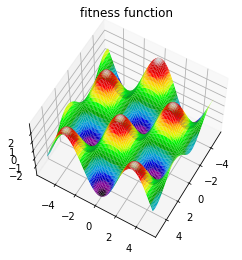

In [2]:
#Defining fitness function & plotting it.
def fitness(X1,X2):
    return (3*np.sin(X1)*np.cos(X2))
    #return  20+((X1**2)-10*np.cos(2*pi*X1))+((X2**2)-10*np.cos(2*pi*X2))
    
u= np.linspace(-5.12,5.12,81)
v= np.linspace(-5.12,5.12,81)
x,y = np.meshgrid(u,v)

z = fitness(x,y)
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='nipy_spectral', edgecolor='none')
ax.set_title('fitness function')
ax.view_init(60,30)

In [3]:
z.min()

-2.9991638184763945

In [4]:
"Define user parameters"
D = 2                  # number of dimension
lower_bound = -5.12         
upper_bound =  5.12
Np          = 10        #number of particles
w = 0.7
c1=1.5
c2=1.5
number_of_iterations = 100

In [5]:
class Particle:

    def __init__(self, D, lower_bound, upper_bound):

        
        self.positions = [0.0 for i in range(D)]
        self.velocities = [0.0 for i in range(D)]

        for i in range(D):
            # Random intialization of particle position
            self.positions[i] = ((upper_bound - lower_bound) * random.random()
                                + lower_bound)
            # Random intialization of particle velocity
            self.velocities[i] = ((upper_bound - lower_bound) * random.random()
                                + lower_bound)

        # Calculating fitness value of each particle
        self.fitness = fitness_function(self.positions)
        
        # Identifying intial pbest(pbest=P)
        self.best_positions = list(self.positions)
        
        # Identfying intial fpbest(fpbest=fP)
        self.best_fitness = self.fitness

In [6]:
#def fitness_function(positions):
    #return 20+((positions[0]**2)-10*np.cos(2*pi*positions[0]))+((positions[1]**2)-10*np.cos(2*positions[1]*pi))

In [7]:
def fitness_function(positions):
    return (3*np.sin(positions[0])*np.cos(positions[1]))

In [8]:
def new_velocity(particle, i):

    # generate random numbers
    r1 = random.random()
    r2 = random.random()

    momentum = (w * particle.velocities[i])
    cognitive= (c1 * r1 * (particle.best_positions[i] - particle.positions[i]))
    social = (c2 * r2 * (best_global_positions[i] - particle.positions[i]))

    new_velocity = momentum+cognitive+social

    return new_velocity

In [9]:
swarm = [Particle(D, lower_bound, upper_bound)for __x in range(Np)]
best_global_positions = [0.0 for v in range(D)]
best_global_fitness = sys.float_info.max

In [10]:
for particle in swarm: 
    if particle.fitness < best_global_fitness:
        best_global_fitness = particle.fitness
        best_global_positions = list(particle.positions)

In [11]:
for iteration in range(number_of_iterations):
    for particle in swarm:
        for i in range(D):

            particle.velocities[i] = new_velocity(particle, i)

            if particle.velocities[i] < lower_bound:
                particle.velocities[i] = lower_bound
            elif particle.velocities[i] > upper_bound:
                particle.velocities[i] = upper_bound

        for v in range(D):
            particle.positions[v] += particle.velocities[v]

            if particle.positions[i] < lower_bound:
                particle.positions[i] = lower_bound
            elif particle.positions[i] > upper_bound:
                particle.positions[i] = upper_bound


        particle.fitness = fitness_function(particle.positions)
        
        if particle.fitness < particle.best_fitness:
            particle.best_fitness = particle.fitness
            particle.best_positions = list(particle.positions)

    
        if particle.fitness < best_global_fitness:
            best_global_fitness = particle.fitness
            best_global_positions = list(particle.positions)
    print('the global best for iteration %s is %s'%(iteration+1,best_global_fitness))


print ( " the global best value is %s at %s"%(best_global_fitness,best_global_positions))

the global best for iteration 1 is -2.8379531400042017
the global best for iteration 2 is -2.8379531400042017
the global best for iteration 3 is -2.8635643182277097
the global best for iteration 4 is -2.8635643182277097
the global best for iteration 5 is -2.8635643182277097
the global best for iteration 6 is -2.8635643182277097
the global best for iteration 7 is -2.8983762855669135
the global best for iteration 8 is -2.9846214751146958
the global best for iteration 9 is -2.9846214751146958
the global best for iteration 10 is -2.9928335099015997
the global best for iteration 11 is -2.9928335099015997
the global best for iteration 12 is -2.9928335099015997
the global best for iteration 13 is -2.9928335099015997
the global best for iteration 14 is -2.9928335099015997
the global best for iteration 15 is -2.994093113851898
the global best for iteration 16 is -2.997543817955299
the global best for iteration 17 is -2.997543817955299
the global best for iteration 18 is -2.997543817955299
the g